# 【問題1】各種手法の実行

In [2]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM, ConvLSTM2D
from keras.datasets import imdb


Using TensorFlow backend.


In [17]:
import numpy as np
import pandas as pd
from keras import backend as K

In [6]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 126s 5ms/step - loss: 0.6922 - accuracy: 0.5340 - val_loss: 0.6655 - val_accuracy: 0.6030
Epoch 2/5
25000/25000 [==============================] - 113s 5ms/step - loss: 0.6287 - accuracy: 0.6333 - val_loss: 0.5793 - val_accuracy: 0.6857
Epoch 3/5
25000/25000 [==============================] - 119s 5ms/step - loss: 0.5201 - accuracy: 0.7448 - val_loss: 0.5428 - val_accuracy: 0.7295
Epoch 4/5
25000/25000 [==============================] - 136s 5ms/step - loss: 0.5030 - accuracy: 0.7508 - val_loss: 0.5543 - val_accuracy: 0.7309
Epoch 5/5
25000/25000 [==============================] - ETA:  - 17s 666us/step
Test score: 0.5957557079029083
Test accuracy: 0.7053999900817871


In [13]:
K.clear_session()

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
gru_score, gru_acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', gru_score)
print('Test accuracy:', gru_acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 231s 9ms/step - loss: 2.8009 - accuracy: 0.6748 - val_loss: 0.5631 - val_accuracy: 0.7086
Epoch 2/5
25000/25000 [==============================] - 317s 13ms/step - loss: 0.4958 - accuracy: 0.8054 - val_loss: 0.5552 - val_accuracy: 0.7107
Epoch 3/5
25000/25000 [==============================] - 256s 10ms/step - loss: 0.5788 - accuracy: 0.8120 - val_loss: 0.5867 - val_accuracy: 0.6824
Epoch 4/5
25000/25000 [==============================] - 241s 10ms/step - loss: 0.3987 - accuracy: 0.8338 - val_loss: 0.5818 - val_accuracy: 0.7040
Epoch 5/5
25000/25000 [==============================] - 28s 1ms/step
Test score: 0.5916801889038086
Test accuracy: 0.7077199816703796


In [14]:
K.clear_session()

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
lstm_score, lstm_acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', lstm_score)
print('Test accuracy:', lstm_acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 215s 9ms/step - loss: 0.4534 - accuracy: 0.7829 - val_loss: 0.3994 - val_accuracy: 0.8181
Epoch 2/5
25000/25000 [==============================] - 170s 7ms/step - loss: 0.3028 - accuracy: 0.8774 - val_loss: 0.3839 - val_accuracy: 0.8305
Epoch 3/5
25000/25000 [==============================] - 193s 8ms/step - loss: 0.2239 - accuracy: 0.9163 - val_loss: 0.4232 - val_accuracy: 0.8313
Epoch 4/5
25000/25000 [==============================] - 213s 9ms/step - loss: 0.1640 - accuracy: 0.9396 - val_loss: 0.4798 - val_accuracy: 0.8262
Epoch 5/5
25000/25000 [==============================] - 36s 1ms/step
Test score: 0.5626066655421257
Test accuracy: 0.8224400281906128


Train on 950 samples, validate on 50 samples
Epoch 1/3
950/950 [==============================] - 3854s 4s/step - loss: 0.2506 - val_loss: 0.4016
Epoch 2/3
950/950 [==============================] - 3505s 4s/step - loss: 0.0242 - val_loss: 0.3725
Epoch 3/3
950/950 [==============================] - 3840s 4s/step - loss: 0.0097 - val_loss: 0.2772


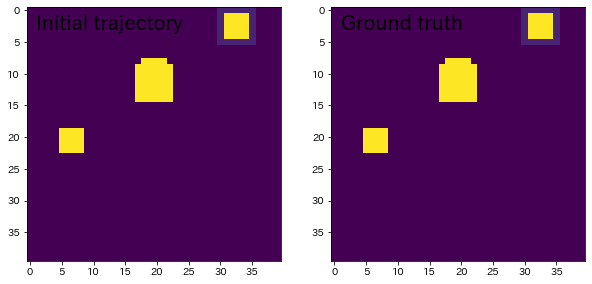

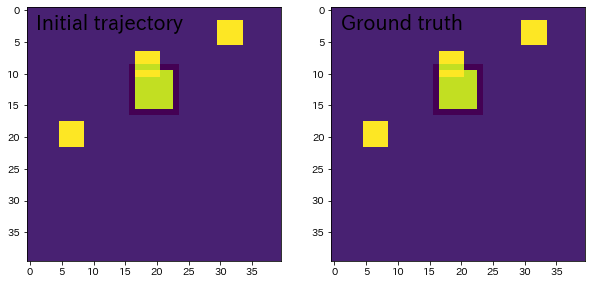

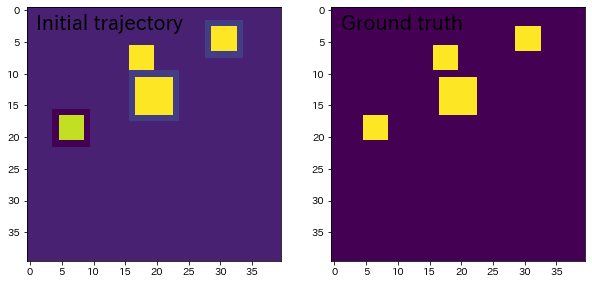

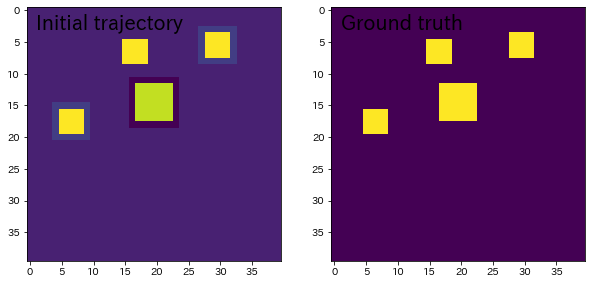

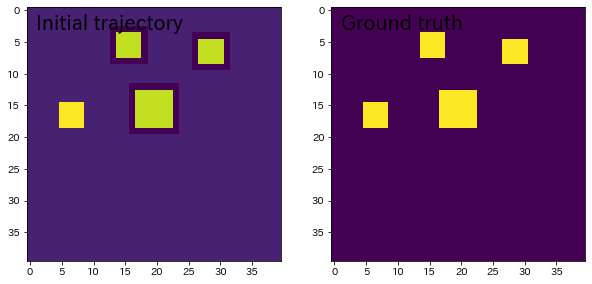

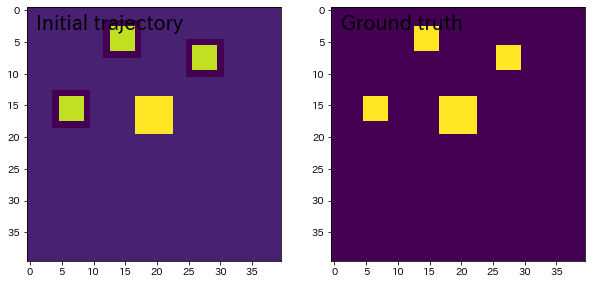

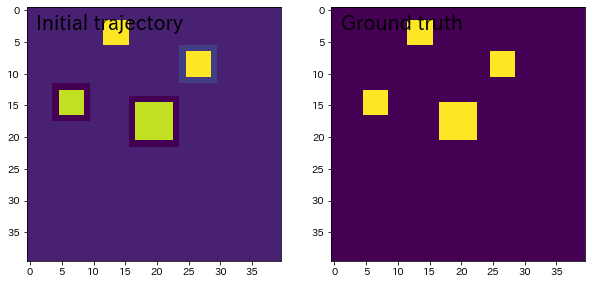

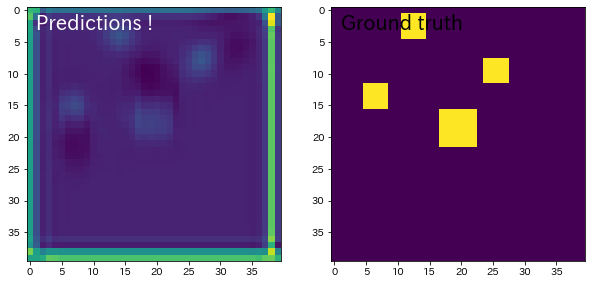

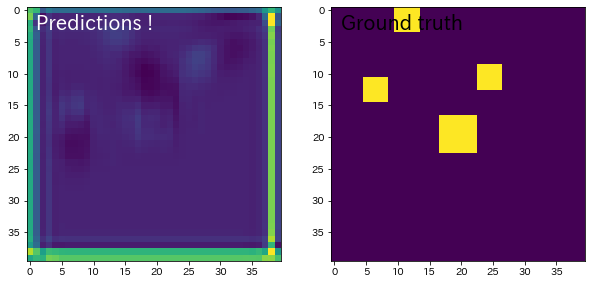

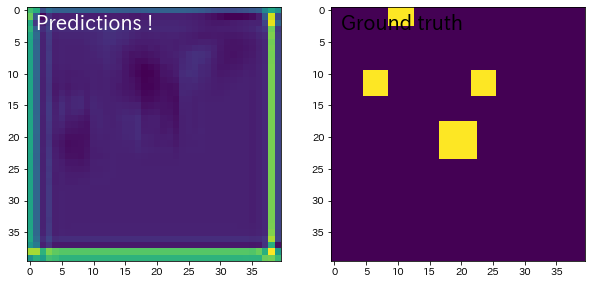

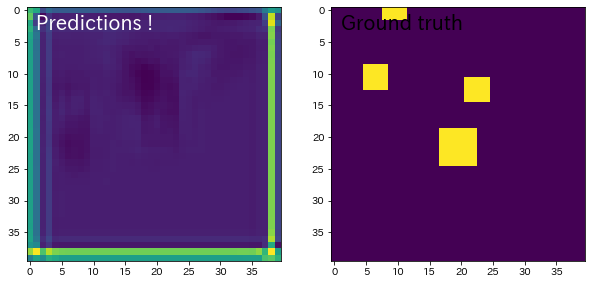

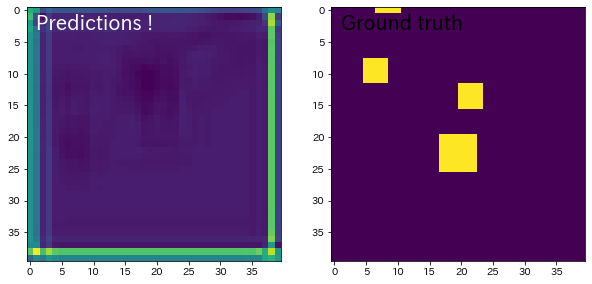

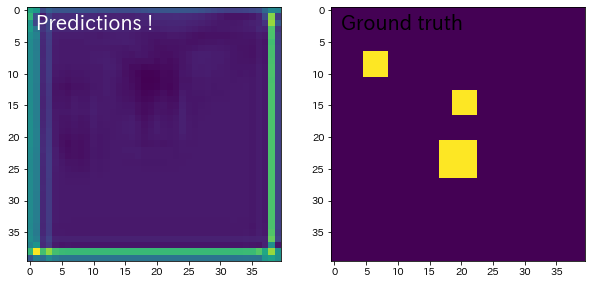

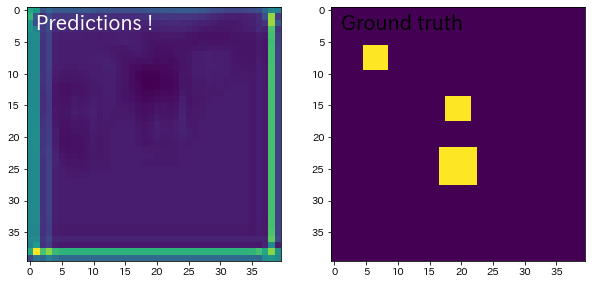

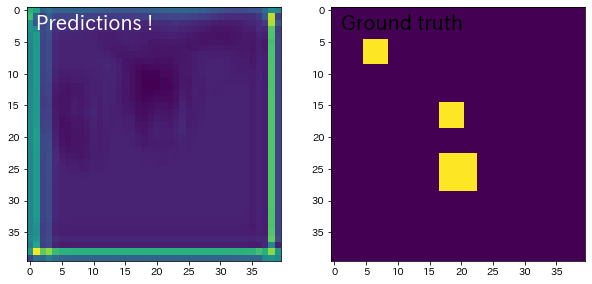

In [16]:
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## modelの比較

In [10]:
simple_rnn_score, simple_rnn_acc = score, acc

In [20]:
pd.DataFrame([[simple_rnn_score, simple_rnn_acc], [gru_score, gru_acc], [lstm_score, lstm_acc]], 
             columns=['score', 'acc'], 
             index=['Simple_RNN', 'GRU', 'LSTM'])

,score,acc
Simple_RNN,0.595756,0.70540
GRU,0.591680,0.70772
LSTM,0.562607,0.82244


## LSTMが一番精度が高かった。

# 【問題3】他のクラスの説明

## RNN
### Recurrentレイヤーに対する基底クラス
### 引数
- cell: RNN cellインスタンス．RNN cellは以下の属性を持つクラスです．
    - call(input_at_t, states_at_t)メソッド，これは(output_at_t, states_at_t_plus_1)を返します． cellのメソッド呼び出しはオプションの引数constantsも使えます． 下記の「外部定数を渡す場合の注意」を参照してください．
    - state_size属性． これは1つの整数（1つの状態）でもよく，その場合はrecurrent stateのサイズになります（これはcellの出力のサイズと同じである必要があります）． （1つ状態につき1つのサイズが対応するように）整数やリストやタプルもとれます． この場合は最初のエントリ(state_size[0])がcellの出力のサイズと同じである必要があります． cellをRNN cellインスタンスのリストとすることも可能です． この場合，cellはRNNの中で他のcellの後にスタックされているいれば，効率的なstacked RNNが実現されます．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- go_backwards: 真理値（デフォルトはFalse）．Trueなら，入力系列を逆向きから処理し，逆順の系列を返します．
- stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます．
- unroll: 真理値（デフォルトはFalse）．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われます． 展開はよりメモリ集中傾向になりますが，RNNをスピードアップできます． 展開は短い系列にのみ適しています．
- input_dim: 入力の次元（整数）． この引数（または代わりのキーワード引数input_shape）は， このレイヤーをモデルの最初のレイヤーとして利用するときに必要です．
- input_length: 入力系列の長さ． この引数はこのレイヤーの後にFlattenからDenseレイヤーへ接続する際に必要です (これがないと，denseの出力のshapeを計算できません)． Recurrentレイヤーがモデルの最初のレイヤーでなければ， 最初のレイヤーのレベルで入力系列の長さを指定する必要があります （例えばinput_shape引数を通じて）．

## SimpleRNNCell
### 出力が入力にフィードバックされる全結合RNN
### 引数

- units: 正の整数値，出力の次元数．
- activation: 活性化関数（activationsを参照）． デフォルト：ハイパボリックタンジェント（tanh）． Noneを渡すと活性化関数は適用されません (例．"linear" activation: a(x) = x)．
- use_bias: 真理値，biasベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）．
- bias_initializer: biasベクトルのInitializer（initializersを参照）．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数（regularizerを参照）．
- kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- go_backwards: 真理値（デフォルトはFalse）．Trueなら，入力系列の後ろから処理し，逆順の系列を返します．
- stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプル に対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます．
- unroll: 真理値（デフォルトはFalse）．Trueなら，ネットワークは展開され， そうでなければシンボリックループが使われます． 展開はよりメモリ集中傾向になりますが，RNNをスピードアップできます． 展開は短い系列にのみ適しています．

## GRUCell
### GRUレイヤーのためのCellクラス
### 引数
- units: 正の整数値，出力の次元数．
- activation: 活性化関数（activationsを参照）． デフォルト：ハイパボリックタンジェント（tanh）． Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）．
- recurrent_activation: 再帰計算時に使う活性化関数（activationsを参照）．
- use_bias: 真理値，レイヤーがバイアスベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）．
- bias_initializer: biasベクトルのInitializer（initializersを参照）．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）．
- kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- implementation: 実装モードで，1か2．モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理します． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるでしょう．
- reset_after: GRUの慣習（行列の乗算の前後のどちらでリセットゲートの適用を行うか）．False = "before" (デフォルト), True = "after" (CuDNN互換).


## LSTMCell
### LSTMレイヤーのためのcellクラス
### 引数
- units: 正の整数値，出力の次元数．
- activation: 活性化関数（activationsを参照）． デフォルト：ハイパボリックタンジェント（tanh）． Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）．
- activation: 活性化関数（activationsを参照）． デフォルト：ハイパボリックタンジェント（tanh）． Noneを渡すと活性化関数は適用されません（つまり"線形"活性: a(x) = x）．
- use_bias: 真理値，biasベクトルを使うかどうか．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）．
- bias_initializer: biasベクトルのInitializer（initializersを参照）．
- unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加えます． bias_initializer="zeros"とともに用いられます． これは-Jozefowicz et al.により推奨されています．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）．
- kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）．
- dropout: 0から1の間の浮動小数点数．入力の線形変換においてdropするユニットの割合．
- recurrent_dropout: 0から1の間の浮動小数点数．再帰の線形変換においてdropするユニットの割合．
- implementation: 実装モードで，1か2．モード1は小さなドット積や加算処理を多数行う構造である一方，モード2は少数の大きな操作をバッチ処理します． これらのモードはハードウェアやアプリケーションによって異なるパフォーマンスプロファイルとなるでしょう．

## StackedRNNCells
### RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われます．
### 引数
- cells: RNN cellインスタンスのリスト．

## CuDNNGRU
### CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作します
### 引数
- units: 正の整数値，出力の次元数．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）．
- bias_initializer: biasベクトルのInitializer（initializersを参照）．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数（regularizerを参照）．
- kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプルに対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます．

## CuDNNLSTM
### CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作します．
### 引数
- units: 正の整数値，出力の次元数．
- kernel_initializer: 入力の線形変換に使われるkernelの重み行列のためのInitializer（initializersを参照）．
- unit_forget_bias: 真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加えます． bias_initializer="zeros"とともに用いられます． これはJozefowicz et al.により推奨されています．
- recurrent_initializer: 再帰の線形変換に使われるrecurrent_kernelの重み行列のInitializer（initializersを参照）．
- bias_initializer: biasベクトルのInitializer（initializersを参照）．
- kernel_regularizer: kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- recurrent_regularizer: recurrent_kernelの重み行列に適用するRegularizer関数（regularizerを参照）．
- bias_regularizer: biasベクトルに適用するRegularizer関数（regularizerを参照）．
- activity_regularizer: 出力 (そのactivation) に適用するRegularizer関数（regularizerを参照）．
- kernel_constraint: kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- recurrent_constraint: recurrent_kernelの重み行列に適用するConstraint関数（constraintsを参照）．
- bias_constraint: biasベクトルに適用するConstraint関数（constraintsを参照）．
- return_sequences: 真理値．出力系列の最後の出力を返すか，完全な系列を返すか．
- return_state: 真理値．出力とともに，最後の状態を返すかどうか．
- stateful: 真理値（デフォルトはFalse）．Trueなら，バッチ内のインデックスiの各サンプルに対する最後の状態が次のバッチ内のインデックスiのサンプルに対する初期状態として使われます．